# Final Exam

# Challenge Overview

In 1998, the Adventure Works Cycles company collected a large volume of data about their existing customers, including demographic features and information about purchases they have made. The company is particularly interested in analyzing customer data to determine any apparent relationships between demographic features known about the customers and the likelihood of a customer purchasing a bike. Additionally, the analysis should endeavor to determine whether a customer's average monthly spend with the company can be predicted from known customer characteristics.

In this project, you must tackle three challenges:

 + Challenge 1: Explore the data and gain some insights into Adventure Works customer characteristics and purchasing behavior.
 + Challenge 2: Build a classification model to predict customer purchasing behavior.
 + Challenge 3: Build a regression model to predict customer purchasing behavior.
 
This data consists of **three** files, containing data that was collected on **January 1st 1998.**

**AdvWorksCusts.csv**
Customer demographic data consisting of the following fields:

 + **CustomerID** (integer) : A unique customer identifier.
 + **Title** (string):The customer's formal title (Mr, Mrs, Ms, Miss Dr, etc.)
 + **FirstName** (string): The customer's first name.
 + **MiddleName** (string): The customer's middle name.
 + **LastName** (string):The customer's last name.
 + **Suffix** (string):A suffix for the customer name (Jr, Sr, etc.)
 + **AddressLine1** (string): The first line of the customer's home address.
 + **AddressLine2** (string):The second line of the customer's home address.
 + **City** (string):The city where the customer lives.
 + **StateProvince** (string):The state or province where the customer lives.
 + **CountryRegion** (string):The country or region where the customer lives.
 + **PostalCode** (string):The postal code for the customer's address.
 + **PhoneNumber** (string):The customer's telephone number.
 + **BirthDate** (date):The customer's date of birth in the format YYYY-MM-DD.
 + **Education** (string):The maximum level of education achieved by the customer: 
   + Partial High School
   + High School
   + Partial College
   + Bachelors
   + Graduate Degree
 + **Occupation** (string):The type of job in which the customer is employed:
   + Manual
   + Skilled Manual
   + Clerical
   + Management
   + Professional
 + **Gender** (string):The customer's gender (for example, M for male, F for female, etc.)
 + **MaritalStatus** (string): Whether the customer is married (M) or single (S).
 + **HomeOwnerFlag**  (integer):A Boolean flag indicating whether the customer owns their own home (1) or not (0).
 + **NumberCarsOwned** (integer):The number of cars owned by the customer.
 + **NumberChildrenAtHome** (integer):The number of children the customer has who live at home.
 + **TotalChildren**  (integer): The total number of children the customer has.
 + **YearlyIncome** (decimal): The annual income of the customer.

**AW_AveMonthSpend.csv**

Sales data for existing customers, consisting of the following fields:

 + **CustomerID** (integer): The unique identifier for the customer.
 + **AveMonthSpend** (decimal): The amount of money the customer spends with Adventure Works Cycles on average each month.

**AW_BikeBuyer.csv**

Sales data for existing customers, consisting of the following fields:

 + **CustomerID** (integer): The unique identifier for the customer.
 + **BikeBuyer** (integer): A Boolean flag indicating whether a customer has previously purchased a bike (1) or not (0).

# Getting Started

## Importing the libraries

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [2]:
import os
os.chdir("E:/Data Science/Microsoft certification/Principal of Machine Learning/Project/Input")

## Extracting training data from zip

In [3]:
# importing required modules 
from zipfile import ZipFile 
  
# specifying the zip file name 
file_name = "FinalExam.zip"
  
# opening the zip file in READ mode 
with ZipFile(file_name, 'r') as zipfile: 
    # printing all the contents of the zip file 
    zipfile.printdir() 
  
    # extracting all the files 
    print('Extracting all the files now...') 
    zipfile.extractall() 
    print('Done!')

File Name                                             Modified             Size
AdvWorksCusts.csv                              2018-04-18 15:27:52      2545537
AW_BikeBuyer.csv                               2018-04-18 15:28:02       148693
AW_AveMonthSpend.csv                           2018-04-18 15:27:58       167346
Extracting all the files now...
Done!


## Reading the file

In [4]:
# Reading the file
AdvWorksCusts = pd.read_csv("AdvWorksCusts.csv")
AW_BikeBuyer = pd.read_csv("AW_BikeBuyer.csv")
AW_AveMonthSpend = pd.read_csv("AW_AveMonthSpend.csv")

# Challenge 1 : EDA

## Checking duplicate records

In [5]:
# Duplicate records
print("Duplicate unique id in AdvWorksCusts:", len(AdvWorksCusts.CustomerID) - len(AdvWorksCusts.CustomerID.unique()))
print("Duplicate unique id in AW_BikeBuyer:", len(AW_BikeBuyer.CustomerID) - len(AW_BikeBuyer.CustomerID.unique()))
print("Duplicate unique id in AW_AveMonthSpend:", len(AW_AveMonthSpend.CustomerID) - len(AW_AveMonthSpend.CustomerID.unique()))

Duplicate unique id in AdvWorksCusts: 115
Duplicate unique id in AW_BikeBuyer: 115
Duplicate unique id in AW_AveMonthSpend: 115


## Removing duplicates rows

In [6]:
# Removing duplicates rows
AdvWorksCusts = AdvWorksCusts.sort_values('CustomerID').drop_duplicates('CustomerID',keep='last')
AW_BikeBuyer = AW_BikeBuyer.sort_values('CustomerID').drop_duplicates('CustomerID',keep='last')
AW_AveMonthSpend = AW_AveMonthSpend.sort_values('CustomerID').drop_duplicates('CustomerID',keep='last')

# Duplicate records
print("Duplicate unique id in AdvWorksCusts:", len(AdvWorksCusts.CustomerID) - len(AdvWorksCusts.CustomerID.unique()))
print("Duplicate unique id in AW_BikeBuyer:", len(AW_BikeBuyer.CustomerID) - len(AW_BikeBuyer.CustomerID.unique()))
print("Duplicate unique id in AW_AveMonthSpend:", len(AW_AveMonthSpend.CustomerID) - len(AW_AveMonthSpend.CustomerID.unique()))

print("Duplicate records removed.")

Duplicate unique id in AdvWorksCusts: 0
Duplicate unique id in AW_BikeBuyer: 0
Duplicate unique id in AW_AveMonthSpend: 0
Duplicate records removed.


## Average Monthly Spend

### Top 5 rows

In [7]:
AW_AveMonthSpend.head()

,CustomerID,AveMonthSpend
0,11000,89
1,11001,117
2,11002,123
3,11003,50
4,11004,95


### Variable type

In [8]:
AW_AveMonthSpend.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16404 entries, 0 to 16507
Data columns (total 2 columns):
CustomerID       16404 non-null int64
AveMonthSpend    16404 non-null int64
dtypes: int64(2)
memory usage: 384.5 KB


### No of records

In [9]:
print("No of rows and columns in dataset:", AW_AveMonthSpend.shape)

No of rows and columns in dataset: (16404, 2)


### Descriptive Statistics

*****
**Q1** : Minimum AveMonthSpend
<br>
**Q2** : Maximum AveMonthSpend
<br>
**Q3** : Mean AveMonthSpend
<br>
**Q4** : Median AveMonthSpend
<br>
**Q5** : Standard deviation AveMonthSpend
*****

In [10]:
AW_AveMonthSpend['AveMonthSpend'].describe()

count    16404.000000
mean        72.391246
std         27.269227
min         22.000000
25%         52.000000
50%         68.000000
75%         84.000000
max        176.000000
Name: AveMonthSpend, dtype: float64

## Bike Buyer

### No of records

In [11]:
print("No of rows and columns in dataset:", AW_BikeBuyer.shape)

No of rows and columns in dataset: (16404, 2)


### Variable type

In [12]:
AW_BikeBuyer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16404 entries, 0 to 16507
Data columns (total 2 columns):
CustomerID    16404 non-null int64
BikeBuyer     16404 non-null int64
dtypes: int64(2)
memory usage: 384.5 KB


### Top 5 rows

In [13]:
AW_BikeBuyer.head()

,CustomerID,BikeBuyer
0,11000,0
1,11001,1
2,11002,0
3,11003,0
4,11004,1


### Frequency summary

*****
**Q6** : distribution of the values in the BikeBuyer

*****

In [14]:
AW_BikeBuyer['BikeBuyer'].value_counts(normalize = True)

0    0.667581
1    0.332419
Name: BikeBuyer, dtype: float64

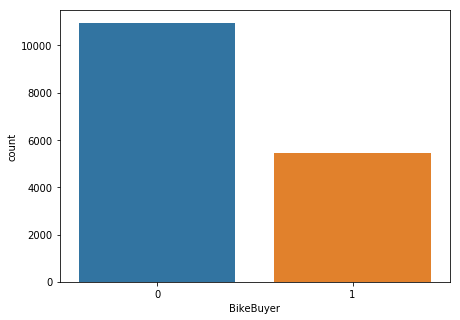

In [15]:
plt.figure(figsize=(7,5))
sns.countplot(x = 'BikeBuyer', data = AW_BikeBuyer);

## AdvWorksCusts

### No of records

In [16]:
print("No of rows and columns in dataset:", AdvWorksCusts.shape)

No of rows and columns in dataset: (16404, 23)


### Variable type

In [17]:
AdvWorksCusts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16404 entries, 0 to 16507
Data columns (total 23 columns):
CustomerID              16404 non-null int64
Title                   88 non-null object
FirstName               16404 non-null object
MiddleName              9453 non-null object
LastName                16404 non-null object
Suffix                  2 non-null object
AddressLine1            16404 non-null object
AddressLine2            272 non-null object
City                    16404 non-null object
StateProvinceName       16404 non-null object
CountryRegionName       16404 non-null object
PostalCode              16404 non-null object
PhoneNumber             16404 non-null object
BirthDate               16404 non-null object
Education               16404 non-null object
Occupation              16404 non-null object
Gender                  16404 non-null object
MaritalStatus           16404 non-null object
HomeOwnerFlag           16404 non-null int64
NumberCarsOwned         16404

### Top 5 rows

In [18]:
AdvWorksCusts.head()

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,Australia,4700,1 (11) 500 555-0162,1966-04-08,Bachelors,Professional,M,M,1,0,0,2,137947
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,Australia,3198,1 (11) 500 555-0110,1965-05-14,Bachelors,Professional,M,S,0,1,3,3,101141
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,Australia,7001,1 (11) 500 555-0184,1965-08-12,Bachelors,Professional,M,M,1,1,3,3,91945
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,Australia,2113,1 (11) 500 555-0162,1968-02-15,Bachelors,Professional,F,S,0,1,0,0,86688
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,Australia,2500,1 (11) 500 555-0131,1968-08-08,Bachelors,Professional,F,S,1,4,5,5,92771


### Descriptive Statistics

In [19]:
AdvWorksCusts.describe()

,CustomerID,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
count,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000
mean,20240.143136,0.674104,1.499756,0.991100,2.004511,78129.811205
std,5340.370705,0.468723,1.139135,1.514278,1.682318,39726.554883
min,11000.000000,0.000000,0.000000,0.000000,0.000000,9482.000000
25%,15617.750000,0.000000,1.000000,0.000000,0.000000,47811.750000
50%,20231.500000,1.000000,2.000000,0.000000,2.000000,76125.000000
75%,24862.250000,1.000000,2.000000,2.000000,3.000000,105200.250000
max,29482.000000,1.000000,4.000000,5.000000,5.000000,196511.000000


*****
**Q7** : correct order (from lowest to highest) that ranks the median YearlyIncome by Occupation
*****

In [20]:
AdvWorksCusts.groupby(['Occupation'])['YearlyIncome'].median()

Occupation
Clerical           49481.0
Management        118781.0
Manual             21722.0
Professional       99051.5
Skilled Manual     66471.5
Name: YearlyIncome, dtype: float64

### Merging datasets

In [21]:
dataset = pd.merge(AdvWorksCusts,AW_BikeBuyer,on = 'CustomerID', how = 'left')
dataset = pd.merge(dataset,AW_AveMonthSpend,on = 'CustomerID', how = 'left')

print("No of rows and columns in dataset:", dataset.shape)

No of rows and columns in dataset: (16404, 25)


In [22]:
# convert the 'BirthDate' column to datetime format 
dataset['BirthDate']= pd.to_datetime(dataset['BirthDate']) 

In [23]:
dataset['diff'] = pd.to_datetime('1998-01-01') - dataset['BirthDate']
dataset['Age'] = dataset['diff'].apply(lambda x: float(x.days)/365.25)
dataset = dataset.drop(['diff'], axis =1)
dataset.head()

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,BikeBuyer,AveMonthSpend,Age
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,Australia,4700,1 (11) 500 555-0162,1966-04-08,Bachelors,Professional,M,M,1,0,0,2,137947,0,89,31.734428
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,Australia,3198,1 (11) 500 555-0110,1965-05-14,Bachelors,Professional,M,S,0,1,3,3,101141,1,117,32.635181
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,Australia,7001,1 (11) 500 555-0184,1965-08-12,Bachelors,Professional,M,M,1,1,3,3,91945,0,123,32.388775
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,Australia,2113,1 (11) 500 555-0162,1968-02-15,Bachelors,Professional,F,S,0,1,0,0,86688,0,50,29.878166
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,Australia,2500,1 (11) 500 555-0131,1968-08-08,Bachelors,Professional,F,S,1,4,5,5,92771,1,95,29.399042


*****
**Q8** : Based on their age at the time when the data was collected (1st January 1998), which group of customers accounts for the highest AveMonthSpend values?
 
*****

In [24]:
dataset['Age_Group'] = '<25'
dataset.loc[(dataset['Age'] >= 25) & (dataset['Age'] < 45), 'Age_Group'] = '25-45'
dataset.loc[(dataset['Age'] >= 45) & (dataset['Age'] < 55), 'Age_Group'] = '45-55'
dataset.loc[dataset['Age'] >= 55,'Age_Group'] = '>55'
dataset.groupby(['Gender','Age_Group'])['AveMonthSpend'].sum()

Gender  Age_Group
F       25-45        293925
        45-55         70079
        <25           70476
        >55           24935
M       25-45        473090
        45-55        109608
        <25          107698
        >55           37695
Name: AveMonthSpend, dtype: int64

*****
**Q9** : Which of the following statements about AveMonthSpend are true?
*****

In [25]:
print(dataset.groupby(['MaritalStatus'])['AveMonthSpend'].median())
print(dataset.groupby(['NumberCarsOwned'])['AveMonthSpend'].median())
print(dataset.groupby(['Gender'])['AveMonthSpend'].median())
print(dataset.groupby(['Gender'])['AveMonthSpend'].std())
print(dataset.groupby(['TotalChildren'])['AveMonthSpend'].median())

MaritalStatus
M    74
S    62
Name: AveMonthSpend, dtype: int64
NumberCarsOwned
0     65
1     63
2     64
3     92
4    100
Name: AveMonthSpend, dtype: int64
Gender
F    52
M    79
Name: AveMonthSpend, dtype: int64
Gender
F    16.412431
M    26.945938
Name: AveMonthSpend, dtype: float64
TotalChildren
0    56
1    61
2    66
3    73
4    83
5    97
Name: AveMonthSpend, dtype: int64


*****
**Q10** : Which of the following statements about BikeBuyer are true?
*****

In [26]:
print(dataset.groupby(['BikeBuyer'])['YearlyIncome'].median())
print(dataset.groupby(['BikeBuyer'])['NumberCarsOwned'].median())

BikeBuyer
0    65957
1    96084
Name: YearlyIncome, dtype: int64
BikeBuyer
0    1
1    2
Name: NumberCarsOwned, dtype: int64


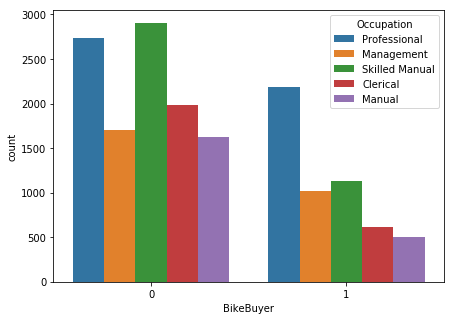

In [27]:
plt.figure(figsize=(7,5));
sns.countplot(x="BikeBuyer", hue="Occupation", data=dataset);

Gender  BikeBuyer
F       0            5881
        1            2233
M       0            5070
        1            3220
Name: Gender, dtype: int64


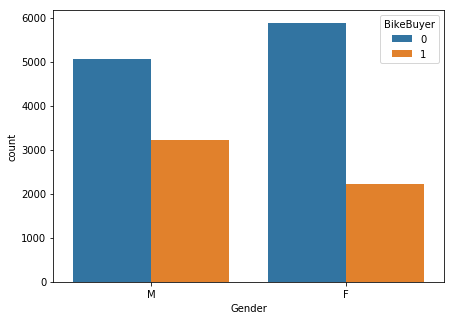

In [28]:
print(dataset.groupby(['Gender','BikeBuyer'])['Gender'].count())
plt.figure(figsize=(7,5));
sns.countplot(x="Gender", hue="BikeBuyer", data=dataset);

MaritalStatus  BikeBuyer
M              0            6654
               1            2198
S              0            4297
               1            3255
Name: Gender, dtype: int64


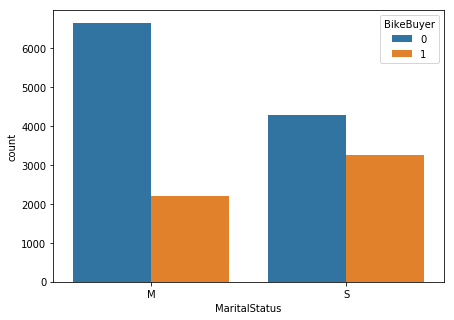

In [29]:
print(dataset.groupby(['MaritalStatus','BikeBuyer'])['Gender'].count())

plt.figure(figsize=(7,5));
sns.countplot(x="MaritalStatus", hue="BikeBuyer", data=dataset);

# Challenge 2 : Classification problem

## Data Preprocessing

In [30]:
# Variable type
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16404 entries, 0 to 16403
Data columns (total 27 columns):
CustomerID              16404 non-null int64
Title                   88 non-null object
FirstName               16404 non-null object
MiddleName              9453 non-null object
LastName                16404 non-null object
Suffix                  2 non-null object
AddressLine1            16404 non-null object
AddressLine2            272 non-null object
City                    16404 non-null object
StateProvinceName       16404 non-null object
CountryRegionName       16404 non-null object
PostalCode              16404 non-null object
PhoneNumber             16404 non-null object
BirthDate               16404 non-null datetime64[ns]
Education               16404 non-null object
Occupation              16404 non-null object
Gender                  16404 non-null object
MaritalStatus           16404 non-null object
HomeOwnerFlag           16404 non-null int64
NumberCarsOwned      

In [31]:
print("Unique values in FirstName:" , len(dataset.FirstName.unique()))
print("Unique values in LastName:" , len(dataset.LastName.unique()))
print("Unique values in City:" , len(dataset.City.unique()))
print("Unique values in StateProvinceName:" , len(dataset.StateProvinceName.unique()))
print("Unique values in CountryRegionName:" , len(dataset.CountryRegionName.unique()))
print("Unique values in PostalCode:" , len(dataset.PostalCode.unique()))
print("Unique values in PhoneNumber:" , len(dataset.PhoneNumber.unique()))
print("Unique values in Education:" , len(dataset.Education.unique()))
print("Unique values in Occupation:" , len(dataset.Occupation.unique()))
print("Unique values in Gender:" , len(dataset.Gender.unique()))
print("Unique values in MaritalStatus:" , len(dataset.MaritalStatus.unique()))

Unique values in FirstName: 662
Unique values in LastName: 363
Unique values in City: 267
Unique values in StateProvinceName: 51
Unique values in CountryRegionName: 6
Unique values in PostalCode: 321
Unique values in PhoneNumber: 7949
Unique values in Education: 5
Unique values in Occupation: 5
Unique values in Gender: 2
Unique values in MaritalStatus: 2


In [32]:
dataset['StateProvinceName'].value_counts()

California             3948
Washington             2017
England                1709
British Columbia       1388
New South Wales        1376
Oregon                  934
Victoria                801
Queensland              713
Saarland                388
Nordrhein-Westfalen     362
Seine (Paris)           341
Hessen                  334
Hamburg                 268
Seine Saint Denis       255
Nord                    247
South Australia         212
Bayern                  198
Hauts de Seine          168
Yveline                 149
Essonne                 131
Tasmania                 92
Loiret                   52
Seine et Marne           52
Moselle                  49
Val d'Oise               27
Brandenburg              27
Val de Marne             26
Garonne (Haute)          25
Somme                    20
Charente-Maritime        19
Pas de Calais            15
Loir et Cher             15
Alberta                  10
Illinois                  6
Texas                     4
Ohio                

In [33]:
train = dataset.drop(['CustomerID','Title','MiddleName','Suffix','AddressLine1', 'AddressLine2', 'FirstName','LastName','City',
                      'StateProvinceName','PostalCode','PhoneNumber', 'Age', 'Age_Group'],axis = 1)
print("No of rows and columns in train:", train.shape)

No of rows and columns in train: (16404, 13)


In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16404 entries, 0 to 16403
Data columns (total 13 columns):
CountryRegionName       16404 non-null object
BirthDate               16404 non-null datetime64[ns]
Education               16404 non-null object
Occupation              16404 non-null object
Gender                  16404 non-null object
MaritalStatus           16404 non-null object
HomeOwnerFlag           16404 non-null int64
NumberCarsOwned         16404 non-null int64
NumberChildrenAtHome    16404 non-null int64
TotalChildren           16404 non-null int64
YearlyIncome            16404 non-null int64
BikeBuyer               16404 non-null int64
AveMonthSpend           16404 non-null int64
dtypes: datetime64[ns](1), int64(7), object(5)
memory usage: 2.4+ MB


In [35]:
train.isnull().sum()

CountryRegionName       0
BirthDate               0
Education               0
Occupation              0
Gender                  0
MaritalStatus           0
HomeOwnerFlag           0
NumberCarsOwned         0
NumberChildrenAtHome    0
TotalChildren           0
YearlyIncome            0
BikeBuyer               0
AveMonthSpend           0
dtype: int64

In [36]:
train.head()

,CountryRegionName,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,BikeBuyer,AveMonthSpend
0,Australia,1966-04-08,Bachelors,Professional,M,M,1,0,0,2,137947,0,89
1,Australia,1965-05-14,Bachelors,Professional,M,S,0,1,3,3,101141,1,117
2,Australia,1965-08-12,Bachelors,Professional,M,M,1,1,3,3,91945,0,123
3,Australia,1968-02-15,Bachelors,Professional,F,S,0,1,0,0,86688,0,50
4,Australia,1968-08-08,Bachelors,Professional,F,S,1,4,5,5,92771,1,95


### Creating New variable : Age

In [37]:
# Creating New variable : Age
train['BirthDate']= pd.to_datetime(train['BirthDate']) 

train['diff'] = pd.to_datetime('1998-01-01') - train['BirthDate']
train['Age'] = train['diff'].apply(lambda x: float(x.days)/365.25)
train = train.drop(['BirthDate', 'diff'], axis =1)

decimals = 0    
train['Age'] = train['Age'].apply(lambda x: round(x, decimals))

train.head()

,CountryRegionName,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,BikeBuyer,AveMonthSpend,Age
0,Australia,Bachelors,Professional,M,M,1,0,0,2,137947,0,89,32.0
1,Australia,Bachelors,Professional,M,S,0,1,3,3,101141,1,117,33.0
2,Australia,Bachelors,Professional,M,M,1,1,3,3,91945,0,123,32.0
3,Australia,Bachelors,Professional,F,S,0,1,0,0,86688,0,50,30.0
4,Australia,Bachelors,Professional,F,S,1,4,5,5,92771,1,95,29.0


### Chaging datatype

In [38]:
train['HomeOwnerFlag'] = train['HomeOwnerFlag'].astype('object')
train['NumberCarsOwned'] = train['NumberCarsOwned'].astype('object')
train['NumberChildrenAtHome'] = train['NumberChildrenAtHome'].astype('object')
train['TotalChildren'] = train['TotalChildren'].astype('object')
train.dtypes

CountryRegionName        object
Education                object
Occupation               object
Gender                   object
MaritalStatus            object
HomeOwnerFlag            object
NumberCarsOwned          object
NumberChildrenAtHome     object
TotalChildren            object
YearlyIncome              int64
BikeBuyer                 int64
AveMonthSpend             int64
Age                     float64
dtype: object

### Checking distribution of numeric features

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


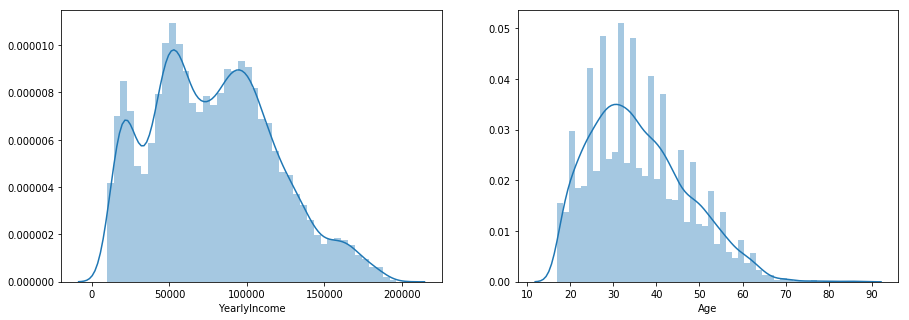

In [39]:
plt.figure(figsize=(15,5));
plt.subplot(1, 2, 1)
sns.distplot(train['YearlyIncome']);
plt.subplot(1, 2, 2)
sns.distplot(train['Age']);

### Visualize class separation by numeric features

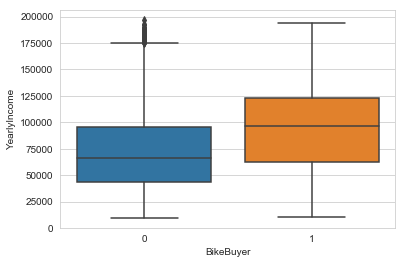

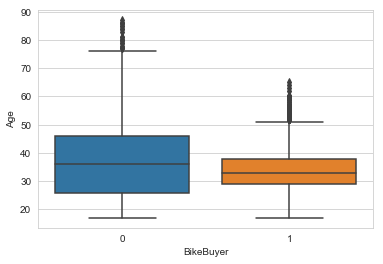

In [40]:
def plot_box(train, cols, col_x = 'BikeBuyer'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col_x, col, data=train)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.show();

num_cols = ['YearlyIncome', 'Age']
plot_box(train, num_cols)

### Visualize class separation by categorical features

In [41]:
cat_cols = train.select_dtypes(include=['object']).columns.tolist()
print(cat_cols)

['CountryRegionName', 'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren']


CountryRegionName


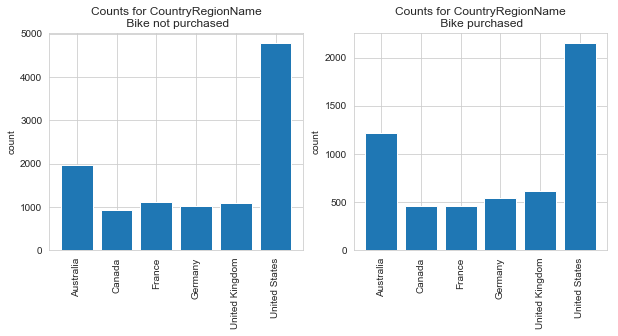

Education


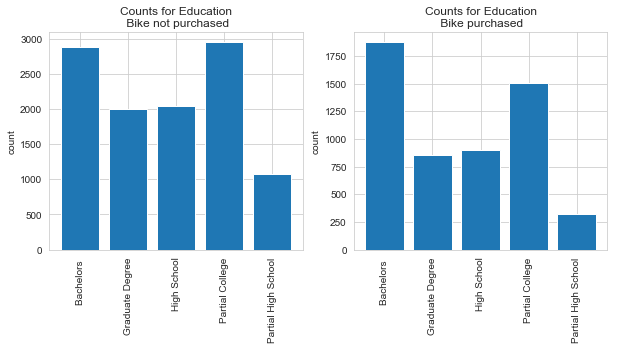

Occupation


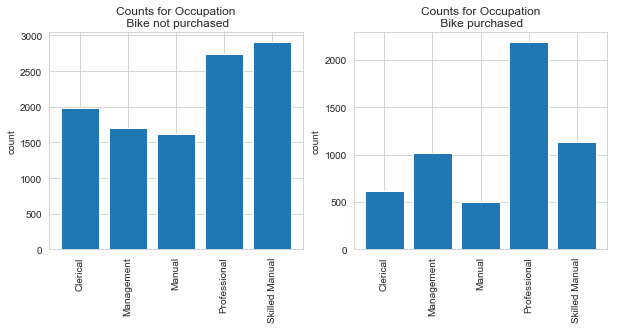

Gender


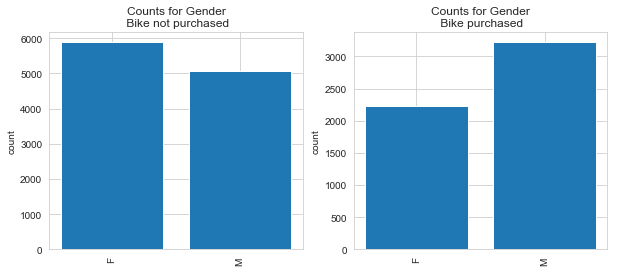

MaritalStatus


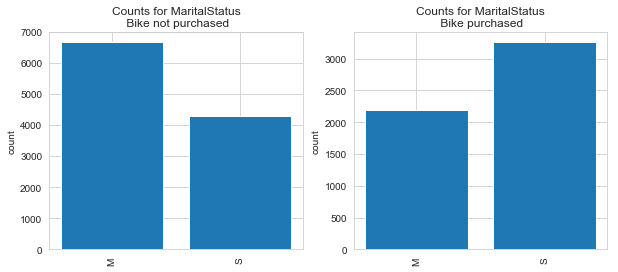

HomeOwnerFlag


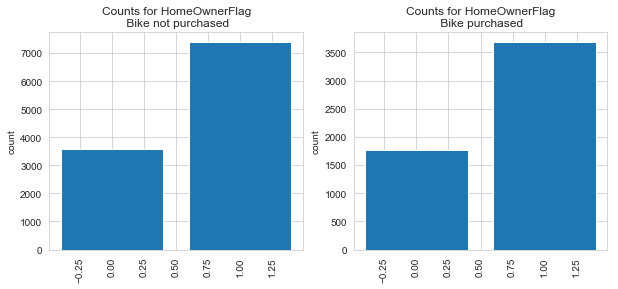

NumberCarsOwned


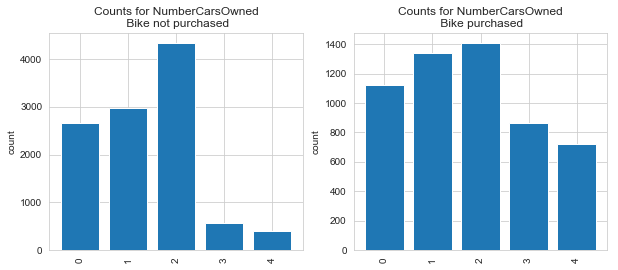

NumberChildrenAtHome


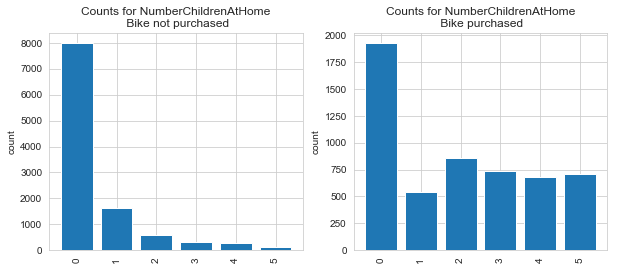

TotalChildren


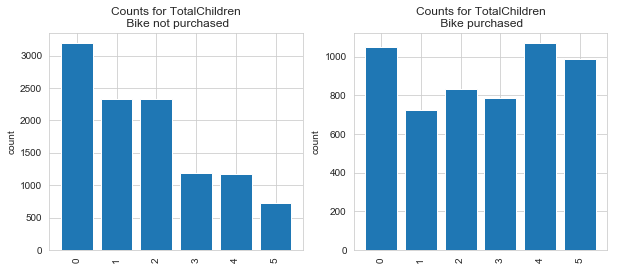

In [42]:
train['dummy'] = np.ones(shape = train.shape[0])
for col in cat_cols:
    print(col)
    counts = train[['dummy', 'BikeBuyer', col]].groupby(['BikeBuyer', col], as_index = False).count()
    #temp = counts[counts['bad_train'] == 0][[col, 'dummy']]
    _ = plt.figure(figsize = (10,4))
    plt.subplot(1, 2, 1)
    temp = counts[counts['BikeBuyer'] == 0][[col, 'dummy']]
    plt.bar(temp[col], temp.dummy)
    plt.xticks(rotation=90)
    plt.title('Counts for ' + col + '\n Bike not purchased')
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    temp = counts[counts['BikeBuyer'] == 1][[col, 'dummy']]
    plt.bar(temp[col], temp.dummy)
    plt.xticks(rotation=90)
    plt.title('Counts for ' + col + '\n Bike purchased')
    plt.ylabel('count')
    plt.show()

In [43]:
for col in train[cat_cols]:
    print("Unique values in " + col + " : ", len(train[col].unique()))

Unique values in CountryRegionName :  6
Unique values in Education :  5
Unique values in Occupation :  5
Unique values in Gender :  2
Unique values in MaritalStatus :  2
Unique values in HomeOwnerFlag :  2
Unique values in NumberCarsOwned :  5
Unique values in NumberChildrenAtHome :  6
Unique values in TotalChildren :  6


In [44]:
# Creating dummy variables
dummy = pd.get_dummies(train[['HomeOwnerFlag','Gender', 'MaritalStatus', 'CountryRegionName', 'Education', 'Occupation', 'NumberCarsOwned','NumberChildrenAtHome', 'TotalChildren']],
                      prefix=['HomeOwnerFlag','Gender', 'MaritalStatus', 'CountryRegionName', 'Education', 'Occupation', 'NumberCarsOwned', 'NumberChildrenAtHome','TotalChildren'],
                      drop_first=True)
# Join the dummy variables to the main dataframe
train = pd.concat([train, dummy], axis=1)

# Dropping original variable
train = train.drop(['HomeOwnerFlag', 'dummy', 'Gender', 'MaritalStatus','CountryRegionName', 'Education', 'Occupation', 'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren'], axis = 1)

print("No of rows and columns in train:", train.shape)

print(train.dtypes)
train.head()

No of rows and columns in train: (16404, 34)
YearlyIncome                          int64
BikeBuyer                             int64
AveMonthSpend                         int64
Age                                 float64
HomeOwnerFlag_1                       uint8
Gender_M                              uint8
MaritalStatus_S                       uint8
CountryRegionName_Canada              uint8
CountryRegionName_France              uint8
CountryRegionName_Germany             uint8
CountryRegionName_United Kingdom      uint8
CountryRegionName_United States       uint8
Education_Graduate Degree             uint8
Education_High School                 uint8
Education_Partial College             uint8
Education_Partial High School         uint8
Occupation_Management                 uint8
Occupation_Manual                     uint8
Occupation_Professional               uint8
Occupation_Skilled Manual             uint8
NumberCarsOwned_1                     uint8
NumberCarsOwned_2              

,YearlyIncome,BikeBuyer,AveMonthSpend,Age,HomeOwnerFlag_1,Gender_M,MaritalStatus_S,CountryRegionName_Canada,CountryRegionName_France,CountryRegionName_Germany,CountryRegionName_United Kingdom,CountryRegionName_United States,Education_Graduate Degree,Education_High School,Education_Partial College,Education_Partial High School,Occupation_Management,Occupation_Manual,Occupation_Professional,Occupation_Skilled Manual,NumberCarsOwned_1,NumberCarsOwned_2,NumberCarsOwned_3,NumberCarsOwned_4,NumberChildrenAtHome_1,NumberChildrenAtHome_2,NumberChildrenAtHome_3,NumberChildrenAtHome_4,NumberChildrenAtHome_5,TotalChildren_1,TotalChildren_2,TotalChildren_3,TotalChildren_4,TotalChildren_5
0,137947,0,89,32.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,101141,1,117,33.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
2,91945,0,123,32.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
3,86688,0,50,30.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,92771,1,95,29.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1


## Creating X & y

In [45]:
# Creating final training data for classification problem
train = train.drop(['AveMonthSpend'], axis = 1)

X = train.drop(['BikeBuyer'], axis = 1)
y = train['BikeBuyer']

#### Split the data

In [46]:
from sklearn.model_selection import train_test_split
SEED = 2000

x_train, x_validation_and_test, y_train, y_validation_and_test = train_test_split(X, y, test_size= 0.3, random_state=SEED)
x_validation, x_test, y_validation, y_test = train_test_split(x_validation_and_test, y_validation_and_test, test_size= 0.5, random_state=SEED)


In [47]:
train_size = len(x_train)
train_zero = len(x_train[y_train == 0]) / (len(x_train)*1.)*100
train_one = len(x_train[y_train == 1]) / (len(x_train)*1.)*100

validation_size = len(x_validation)
validation_zero = len(x_validation[y_validation == 0]) / (len(x_validation)*1.)*100
validation_one = len(x_validation[y_validation == 1]) / (len(x_validation)*1.)*100

test_size = len(x_test)
test_zero = len(x_test[y_test == 0]) / (len(x_test)*1.)*100
test_one = len(x_test[y_test == 1]) / (len(x_test)*1.)*100

train_stats = (train_size, train_zero, train_one)
validation_stats = (validation_size, validation_zero, validation_one)
test_stats = (test_size, test_zero, test_one)

data_types = ('train', 'validation', 'test')
validation_summary_stats = pd.DataFrame([train_stats, validation_stats, test_stats])
validation_summary_stats.columns = ['samplesize', 'Zero', 'One']
validation_summary_stats.index = data_types
validation_summary_stats

,samplesize,Zero,One
train,11482,66.800209,33.199791
validation,2461,67.696059,32.303941
test,2461,65.623730,34.376270


### Feature Scaling

In [48]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_train[['YearlyIncome', 'Age']] = scaler.fit_transform(x_train[['YearlyIncome', 'Age']])
x_validation[['YearlyIncome', 'Age']] = scaler.transform(x_validation[['YearlyIncome', 'Age']])
x_test[['YearlyIncome', 'Age']] = scaler.transform(x_test[['YearlyIncome', 'Age']])

x_train.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs

,YearlyIncome,Age,HomeOwnerFlag_1,Gender_M,MaritalStatus_S,CountryRegionName_Canada,CountryRegionName_France,CountryRegionName_Germany,CountryRegionName_United Kingdom,CountryRegionName_United States,Education_Graduate Degree,Education_High School,Education_Partial College,Education_Partial High School,Occupation_Management,Occupation_Manual,Occupation_Professional,Occupation_Skilled Manual,NumberCarsOwned_1,NumberCarsOwned_2,NumberCarsOwned_3,NumberCarsOwned_4,NumberChildrenAtHome_1,NumberChildrenAtHome_2,NumberChildrenAtHome_3,NumberChildrenAtHome_4,NumberChildrenAtHome_5,TotalChildren_1,TotalChildren_2,TotalChildren_3,TotalChildren_4,TotalChildren_5
1841,0.222907,0.086957,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
13044,0.073743,0.362319,0,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
13374,0.420053,0.362319,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2646,0.019756,0.536232,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
6652,0.097573,0.086957,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0


### Checking various Machine Learning models

In [49]:
from sklearn.utils import class_weight
class_weight = class_weight.compute_class_weight('balanced'
                                               ,np.unique(y_train)
                                               ,y_train)

class_weight

array([0.74850065, 1.50603358])

In [50]:
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier, PassiveAggressiveClassifier, Perceptron
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier 
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from time import time
from sklearn.metrics import roc_auc_score, f1_score, classification_report

In [51]:
def accuracy_summary(classifier, x_train, y_train, x_validation, y_validation):
    t0 = time()
    model = classifier.fit(x_train, y_train)
    y_pred = model.predict(x_validation)
    train_test_time = time() - t0
    accuracy = roc_auc_score(y_validation, y_pred)
    return accuracy, train_test_time

In [52]:
seed = 123
names = ["Logistic Regression", "LinearDiscriminantAnalysis", "SGDClassifier", "Linear SVC", "LinearSVC with L1-based feature selection",
         "Support Vector Machine with Gaussian kernel","Gaussian NB", "Bernoulli NB", "Ridge Classifier", "Perceptron","Passive-Aggresive", "KNeighborsClassifier","NearestCentroid",
        "DecisionTreeClassifier","RandomForestClassifier","AdaBoostClassifier", "GradientBoostingClassifier", "XGBClassifier"]

classifiers = [
    LogisticRegression(penalty='l2', class_weight = 'balanced', random_state=seed,C=1),
    LinearDiscriminantAnalysis(),
    SGDClassifier(class_weight = 'balanced', random_state=seed),
    LinearSVC(class_weight = 'balanced', random_state=seed),
    Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(penalty="l1", dual=False))),
  ('classification', LinearSVC(penalty="l2", class_weight = 'balanced', random_state=seed))]),
    SVC(random_state=seed, class_weight = 'balanced'),
    GaussianNB(),
    BernoulliNB(),
    RidgeClassifier(class_weight = 'balanced', random_state=seed),
    Perceptron(penalty='l2', class_weight = 'balanced', random_state=seed),
    PassiveAggressiveClassifier(class_weight = 'balanced', random_state=seed),
    KNeighborsClassifier(metric = 'jaccard'),
    NearestCentroid(metric = 'jaccard'),
    DecisionTreeClassifier(criterion = 'entropy', random_state = seed, class_weight = 'balanced'),
    RandomForestClassifier(criterion = 'entropy', random_state = seed, class_weight = 'balanced'),
    AdaBoostClassifier(random_state = seed),
    GradientBoostingClassifier(random_state = seed),
    XGBClassifier(random_state = seed)
    ]

zipped_clf = zip(names,classifiers)

def classifier_comparator(classifier=zipped_clf):
    result = []
    for n,c in classifier:
        checker_pipeline = Pipeline([
            ('classifier', c)
        ])
        print("Validation result for {}".format(n))
        print (c)
        clf_accuracy,tt_time = accuracy_summary(checker_pipeline, x_train, y_train, x_validation, y_validation)
        result.append((n,clf_accuracy,tt_time))
    return result

In [53]:
classifier_result = classifier_comparator()
classifier_result

Validation result for Logistic Regression
LogisticRegression(C=1, class_weight='balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=123, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Validation result for LinearDiscriminantAnalysis
LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)
Validation result for SGDClassifier
SGDClassifier(alpha=0.0001, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=123, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
Validation result for Linear SVC
LinearSVC(C=1.0, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=123, tol=0.0001,
          verbose=0)
Validation result for LinearSVC with L1-based feature selection
Pi

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Validation result for Gaussian NB
GaussianNB(priors=None, var_smoothing=1e-09)
Validation result for Bernoulli NB
BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
Validation result for Ridge Classifier
RidgeClassifier(alpha=1.0, class_weight='balanced', copy_X=True,
                fit_intercept=True, max_iter=None, normalize=False,
                random_state=123, solver='auto', tol=0.001)
Validation result for Perceptron
Perceptron(alpha=0.0001, class_weight='balanced', early_stopping=False,
           eta0=1.0, fit_intercept=True, max_iter=1000, n_iter_no_change=5,
           n_jobs=None, penalty='l2', random_state=123, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)
Validation result for Passive-Aggresive
PassiveAggressiveClassifier(C=1.0, average=False, class_weight='balanced',
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=1000, n_iter_no_chan

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\nearest_centroid.py:141: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn("Averaging for metrics other than "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\nearest_centroid.py:141: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn("Averaging for metrics other than "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


Validation result for RandomForestClassifier
RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators='warn', n_jobs=None, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Validation result for AdaBoostClassifier
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=123)
Validation result for GradientBoostingClassifier
GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
Validation result for XGBClassifier
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel

[('Logistic Regression', 0.7438005390835578, 0.4498155117034912),
 ('LinearDiscriminantAnalysis', 0.7141014896524647, 1.254291296005249),
 ('SGDClassifier', 0.7444053092935288, 0.19687962532043457),
 ('Linear SVC', 0.7480728140312728, 0.595634937286377),
 ('LinearSVC with L1-based feature selection',
  0.7480728140312728,
  0.781524658203125),
 ('Support Vector Machine with Gaussian kernel',
  0.7524598518652743,
  14.115362405776978),
 ('Gaussian NB', 0.6877615197022204, 1.4238708019256592),
 ('Bernoulli NB', 0.6813132800289927, 0.11234116554260254),
 ('Ridge Classifier', 0.7485582912410246, 0.9350919723510742),
 ('Perceptron', 0.6339094128217324, 0.04996800422668457),
 ('Passive-Aggresive', 0.6660207479218102, 0.04097461700439453),
 ('KNeighborsClassifier', 0.7070884957756687, 8.037083625793457),
 ('NearestCentroid', 0.5, 0.16519904136657715),
 ('DecisionTreeClassifier', 0.671129206399541, 0.26209449768066406),
 ('RandomForestClassifier', 0.6893195013854598, 0.3239152431488037),
 ('A

In [54]:
classifier_result_df = pd.DataFrame(classifier_result)
classifier_result_df.columns = ['Classifier', 'AUC Score', 'Train and test time']
classifier_result_df.sort_values(by='AUC Score', ascending=False)

,Classifier,AUC Score,Train and test time
5,Support Vector Machine with Gaussian kernel,0.752460,14.115362
8,Ridge Classifier,0.748558,0.935092
3,Linear SVC,0.748073,0.595635
4,LinearSVC with L1-based feature selection,0.748073,0.781525
15,AdaBoostClassifier,0.744420,1.000648
2,SGDClassifier,0.744405,0.196880
0,Logistic Regression,0.743801,0.449816
16,GradientBoostingClassifier,0.739201,2.344039
17,XGBClassifier,0.738786,1.612665
1,LinearDiscriminantAnalysis,0.714101,1.254291


In [67]:
seed = 786
clf = SVC(C = 50.0, gamma = 'auto', random_state=seed, class_weight = 'balanced')
clf = clf.fit(x_train, y_train)

y_predict = clf.predict(x_validation)

from sklearn.metrics import roc_auc_score, f1_score, classification_report
F1_scores_holdout = f1_score(y_validation, y_predict, average="macro")
AUC_scores_holdout = roc_auc_score(y_validation, y_predict)
print(classification_report(y_validation, y_predict))
print("F1 Score for hold-out sample data:", round(F1_scores_holdout*100,2))
print("AUC Score for hold-out sample data:", round(AUC_scores_holdout*100,2))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83      1666
           1       0.63      0.73      0.68       795

    accuracy                           0.78      2461
   macro avg       0.75      0.76      0.75      2461
weighted avg       0.79      0.78      0.78      2461

F1 Score for hold-out sample data: 75.35
AUC Score for hold-out sample data: 76.46


## Final validation accuracy

In [68]:
y_predict = clf.predict(x_test)

from sklearn.metrics import roc_auc_score, f1_score, classification_report
F1_scores_holdout = f1_score(y_test, y_predict, average="macro")
AUC_scores_holdout = roc_auc_score(y_test, y_predict)
print(classification_report(y_test, y_predict))
print("F1 Score for hold-out sample data:", round(F1_scores_holdout*100,2))
print("AUC Score for hold-out sample data:", round(AUC_scores_holdout*100,2))

              precision    recall  f1-score   support

           0       0.85      0.76      0.80      1615
           1       0.62      0.75      0.68       846

    accuracy                           0.75      2461
   macro avg       0.73      0.75      0.74      2461
weighted avg       0.77      0.75      0.76      2461

F1 Score for hold-out sample data: 73.91
AUC Score for hold-out sample data: 75.25


In [84]:
from sklearn.metrics import accuracy_score
Accuracy = accuracy_score(y_test, y_predict)
print("Accuracy Score for hold-out sample data:", round(Accuracy*100,2))

Accuracy Score for hold-out sample data: 75.42


In [85]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict)

array([[1224,  391],
       [ 214,  632]], dtype=int64)

# Prediction for Test data

In [77]:
# specifying the zip file name 
file_name = "FinalExam-Test.zip"
  
# opening the zip file in READ mode 
with ZipFile(file_name, 'r') as zipfile_test: 
    # printing all the contents of the zip file 
    zipfile_test.printdir() 
  
    # extracting all the files 
    print('Extracting all the files now...') 
    zipfile_test.extractall() 
    print('Done!')

File Name                                             Modified             Size
AW_test.csv                                    2018-06-25 13:01:50        76923
Extracting all the files now...
Done!


In [78]:
# Reading the file
AW_test = pd.read_csv("AW_test.csv")

In [79]:
# Duplicate records
print("Duplicate unique id in AW_test:", len(AW_test.CustomerID) - len(AW_test.CustomerID.unique()))

Duplicate unique id in AW_test: 0


In [80]:
print("No of rows and columns in test before dropping:", AW_test.shape)
test = AW_test.drop(['CustomerID','Title','MiddleName','Suffix','AddressLine1', 'AddressLine2', 'FirstName','LastName','City',
                      'StateProvinceName','PostalCode','PhoneNumber'],axis = 1)
print("No of rows and columns in train:", test.shape)

No of rows and columns in test before dropping: (500, 23)
No of rows and columns in train: (500, 11)


In [81]:
test.isnull().sum()

CountryRegionName       0
BirthDate               0
Education               0
Occupation              0
Gender                  0
MaritalStatus           0
HomeOwnerFlag           0
NumberCarsOwned         0
NumberChildrenAtHome    0
TotalChildren           0
YearlyIncome            0
dtype: int64

In [82]:
# Creating New variable : Age
test['BirthDate']= pd.to_datetime(test['BirthDate']) 

test['diff'] = pd.to_datetime('1998-01-01') - test['BirthDate']
test['Age'] = test['diff'].apply(lambda x: float(x.days)/365.25)
test = test.drop(['BirthDate', 'diff'], axis =1)

decimals = 0    
test['Age'] = test['Age'].apply(lambda x: round(x, decimals))

test.head()

,CountryRegionName,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,Age
0,United States,Bachelors,Management,F,S,0,2,0,5,86931,53.0
1,Canada,Bachelors,Skilled Manual,M,M,1,2,2,4,100125,33.0
2,United States,Graduate Degree,Management,F,M,1,2,0,4,103985,64.0
3,United States,Graduate Degree,Skilled Manual,M,M,1,0,0,4,127161,39.0
4,France,High School,Manual,F,M,1,1,2,2,21876,33.0


In [83]:
print("No of rows and columns in test:", test.shape)

test['HomeOwnerFlag'] = test['HomeOwnerFlag'].astype('object')
test['NumberCarsOwned'] = test['NumberCarsOwned'].astype('object')
test['NumberChildrenAtHome'] = test['NumberChildrenAtHome'].astype('object')
test['TotalChildren'] = test['TotalChildren'].astype('object')

# Creating dummy variables
dummy = pd.get_dummies(test[['HomeOwnerFlag','Gender', 'MaritalStatus', 'CountryRegionName', 'Education', 'Occupation', 'NumberCarsOwned','NumberChildrenAtHome', 'TotalChildren']],
                      prefix=['HomeOwnerFlag','Gender', 'MaritalStatus', 'CountryRegionName', 'Education', 'Occupation', 'NumberCarsOwned', 'NumberChildrenAtHome','TotalChildren'],
                      drop_first=True)
# Join the dummy variables to the main dataframe
test = pd.concat([test, dummy], axis=1)

# Dropping original variable
test = test.drop(['HomeOwnerFlag', 'Gender', 'MaritalStatus','CountryRegionName', 'Education', 'Occupation', 'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren'], axis = 1)

# Feature Scaling
test[['YearlyIncome', 'Age']] = scaler.transform(test[['YearlyIncome', 'Age']])

print("No of rows and columns in test:", test.shape)

print(test.dtypes)
test.head()

No of rows and columns in test: (500, 11)
No of rows and columns in test: (500, 32)
YearlyIncome                        float64
Age                                 float64
HomeOwnerFlag_1                       uint8
Gender_M                              uint8
MaritalStatus_S                       uint8
CountryRegionName_Canada              uint8
CountryRegionName_France              uint8
CountryRegionName_Germany             uint8
CountryRegionName_United Kingdom      uint8
CountryRegionName_United States       uint8
Education_Graduate Degree             uint8
Education_High School                 uint8
Education_Partial College             uint8
Education_Partial High School         uint8
Occupation_Management                 uint8
Occupation_Manual                     uint8
Occupation_Professional               uint8
Occupation_Skilled Manual             uint8
NumberCarsOwned_1                     uint8
NumberCarsOwned_2                     uint8
NumberCarsOwned_3                   

,YearlyIncome,Age,HomeOwnerFlag_1,Gender_M,MaritalStatus_S,CountryRegionName_Canada,CountryRegionName_France,CountryRegionName_Germany,CountryRegionName_United Kingdom,CountryRegionName_United States,Education_Graduate Degree,Education_High School,Education_Partial College,Education_Partial High School,Occupation_Management,Occupation_Manual,Occupation_Professional,Occupation_Skilled Manual,NumberCarsOwned_1,NumberCarsOwned_2,NumberCarsOwned_3,NumberCarsOwned_4,NumberChildrenAtHome_1,NumberChildrenAtHome_2,NumberChildrenAtHome_3,NumberChildrenAtHome_4,NumberChildrenAtHome_5,TotalChildren_1,TotalChildren_2,TotalChildren_3,TotalChildren_4,TotalChildren_5
0,0.414102,0.521739,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,0.484647,0.231884,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0
2,0.505285,0.681159,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,0.629202,0.318841,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0.066268,0.231884,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0


In [87]:
y_predict_test = clf.predict(test)
Submission = pd.DataFrame()
Submission['CustomerID'] = AW_test['CustomerID']
Submission['BikeBuyer'] = y_predict_test


print(Submission['BikeBuyer'].value_counts())
Submission.head()

0    294
1    206
Name: BikeBuyer, dtype: int64


,CustomerID,BikeBuyer
0,18988,0
1,29135,1
2,12156,0
3,13749,0
4,27780,0


In [88]:
Submission.to_csv("E:/Data Science/Microsoft certification/Principal of Machine Learning/Project/Output/Submission_classification_v1.csv", 
                  index = False)